Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, November 14, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every following sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

In Euclidean space, the most basic element is point out of which various gerometric figures are constructed such as line, plane, circle, triangle etc. The Euclidean spaces can be of nonnegative integer dimensions. the distance between any 2 points is measured by euclidean distance.
The Cartesian plane is defined by orthogonal planes and the location of any point on the plane is defined by the ordered pair of numbers representing x and y axes.


**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

Euclidean distance of a vector from an orgin is called the norm of a vector. The Euclidean distance is the norm of difference of 2 vectors.
$$Euclidean Distance = \sqrt{(x1 - y1)^2 + (x2 - y2)^2......(x_{n} - y_{n})^2}$$

- Addition of Vectors: consider two vectors v and w. Numerically we can just add the components of the vectors. 
ex) If v = [1,2] and w = [5,-6], then v+w = [1+5, 2+(-6)]=[6,-4] # zero vector addition 0+v = v 
- Subtraction of Vectors: Numerically we can just subtract the components of the vectors. 
ex) If v = [1,2] and w = [5,-6], then v-w = [1-5,2-(-6)] = [-4,8]

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

The scalar product of two vectors is defined as the product of the magnitudes of the two vectors and the cosine of the angles between them. 


## Assignment 1: Contrast enhancement [5 Points]

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

- Contrast is a difference in color or luminance that distinguishes the objects with other object in the same field of view. In terms of histogram the the distribution of pixels are spread across the gray scale (i.e. 0 - 255). It is one of ways to improve human's visibility and also, it could be used as a preprocessing way to enhance the probability for machine to detect significant information such as edge.

- Low contrast can occur when limited range of pixel values are clustered together and not spread away, or under conditions such as overexposure or underexposure. A low contrast image blends light and dark areas, causing the dullness in the composition of lights and darks and mute the colors in the image. Therefore, low contrast can be a problem for human vision and human perception result from their vision.

- Improvement of contrast can be achieved by non-monotonic, non invertible transfer functions, or pseudo-color. Global contrast can be imporved by linear transforms and nonlinear transforms obtained from histogram equalization. Local contrast is usually stronger, and contribute to the enhancement of irrelevant patterns.

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

- Histogram equalization is a method that improves the contrast in images. It is done by distributing the most frequent high intensity values across the image.

- Entropy is the measure of the average amount of information needed to represent an event drawn from probability distribution of random variables. The more the entropy is, the more information it has. By equalizing the histogram, entropy can be maximized since It distributes the intensity values in a more uniform manner within an image.

### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

The example considers 3 bit image with 8 gray pixel values with 1000 pixels. Frequecy values of each pixels are in in the 'Frequency' row. The row 'H(g)' show the normalized values on the scale of 0 - 1. 'Accumulated' row gives the cumulative of the normalized values.'Gray Value' show the computed value on the basis of transfer function. We get the ceiling value by rounding up and then substracting 1 from the value gives the equalized value on the histogram.

## Assignment 2: Computing Contrast and Entropy [5 Points]


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


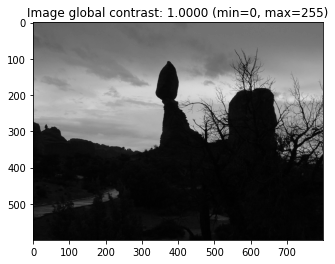

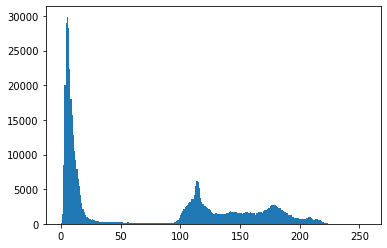

In [16]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)
        
    # YOUR CODE HERE
    contrast = (1/(value_range[1] - value_range[0])) * (np.max(img) - np.min(img))

    return contrast

img = imread('/content/drive/My Drive/Coxi/ComputerVision/Sheet02/images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

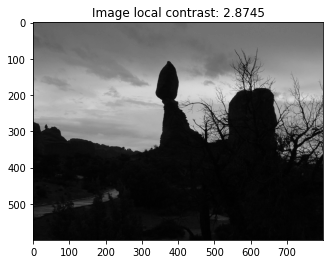

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """
    # YOUR CODE HERE
    kernel = np.array([[0,1,0],
                       [1,0,1],
                       [0,1,0]])/4
    pad = np.zeros((img.shape[0]+2, img.shape[1]+2))
    pad[0,1:-1] = img[0,:]
    pad[-1,1:-1] = img[-1,:]
    pad[1:-1,0] = img[:,0]
    pad[1:-1,-1] = img[:,-1]
    pad[1:-1,1:-1] = img
    contrast = 0 

    for i in range(1, img.shape[0]+1):
      for j in range(1, img.shape[1]+1):
        avg = 0
        avg += (pad[i-1:i+2,j-1:j+2]*kernel).sum()
        # print(avg)
        contrast += abs(pad[i,j] - avg)
    contrast = contrast/img.size
    return contrast


img = imread('/content/drive/My Drive/Coxi/ComputerVision/Sheet02/images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

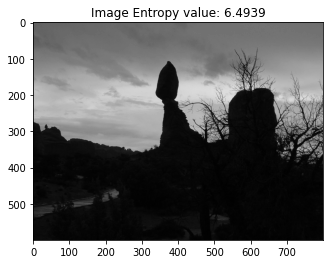

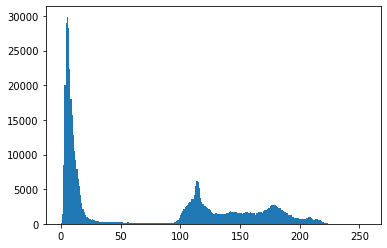

In [14]:
%matplotlib inline
import numpy as np
import math
from imageio import imread

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        img_entropy (float): The entropy of the image. 
    """
# #     YOUR CODE HERE
#     marg = np.histogram(np.ravel(img), bins = 256)[0]/img.size
#     marg = list(filter(lambda p: p > 0, np.ravel(marg)))
#     entropy = -np.sum(np.multiply(marg, np.log2(marg)))

    value, cnt = np.unique(img, return_counts = True)
    
    probs = cnt / len(np.ravel(img))
    entropy = -np.sum(np.multiply(probs, np.log2(probs)))
    
    
    return entropy
    

img = imread('/content/drive/My Drive/Coxi/ComputerVision/Sheet02/images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()


### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

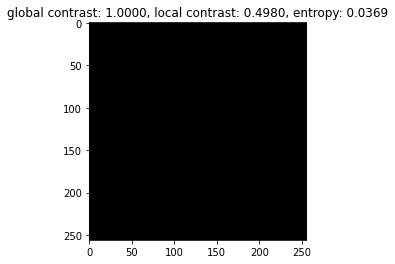

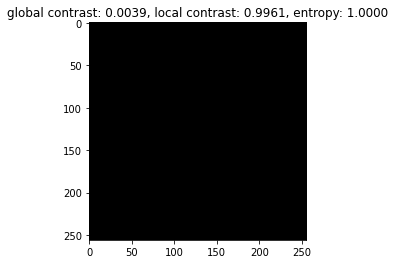

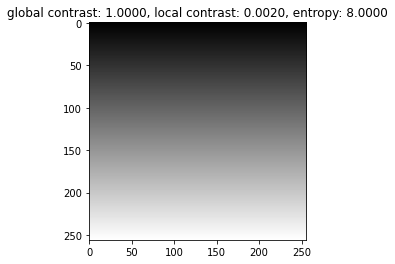

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    """ Displays an image, local and global contrast, and the entropy
    
    Args:
        img (ndarray): Image which is displayed and statics are computed for.
        
    """
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


img1 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
img1[0]= 255

image_info(img1)


img2 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
img2[::2, 1::2] = 1
img2[1::2, ::2] =1

image_info(img2)


img3 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
for i in range(256):
    img3[i,:] = i

image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (AHE) [5 Points]

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

In AHE, histogram is computed for each pixel individually from a pre defined surroundings. It means that It adapts histogram equalization to each and every local patch of an image. HE as a global contrest, it takes an image to the extremes, which means it could make this image too dark or bright. And this is where AHE comes in. Linearization of AHE yields an individaul transfer function for each pixel, and it serves better when local contrast needs to be improve and edges of specific regions need to be enhances.

Main drawbacks - 
It also enhances the contrast of a nearby regions as well. It makes each boundary from an image patch will seem unnatural and too blunt, since it processes with a unit of an image patch.

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

CLAHE is introduced to reduce nosie problem associated with AHE. It can be used over AHE to overcome the problem of overamplification of nearby regions. It rather performs a linear interpolation at the edges, so It doesn't show the blunt areas from the edges.
In CLAHE, contrast values are clipped at predefined values. Clipped limit depends on the size of neighborhood region.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

The image(gray-value distribution in the surrounding contextual areas) is subdivided by the rectangular shape based on the histogram of the piel contained. Then, the pixel intensity is calculated by bilinear interpolation of the gray-level mappings that were calculated for each orf the surrounding contextual regions.

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

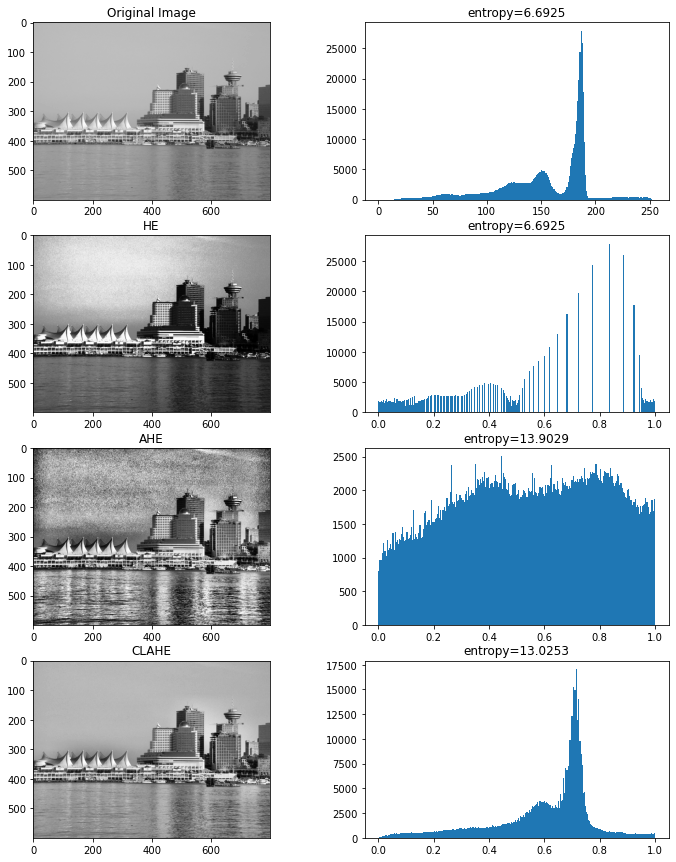

In [ ]:
%matplotlib inline
# YOUR CODE HERE
from imageio import imread
import matplotlib.pyplot as plt
import skimage
from skimage import exposure


img = imread('images/canada.png', pilmode='L')

img_he = skimage.exposure.equalize_hist(img, nbins =256) # CHANGE THIS
img_ahe =  skimage.exposure.equalize_adapthist(img, clip_limit = 0) # CHANGE THIS
img_clahe = skimage.exposure.equalize_adapthist(img, clip_limit = 0.01, nbins = 256) # CHANGE THIS
# YOUR CODE HERE

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps[5 Points]

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

- Sequential: change in lightness and often saturation incrementally, often using single hue. It is used for information which has ordering

- Diverging: change in lightness and possibly saturation of 2 different colors that meet in the middle at unsaturated color. It is used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero

- Qualitative: often are miscelleneous colors. Often represents information which does not have ordering or relationships


For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

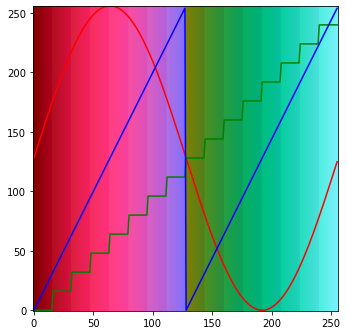

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

color = []

# The following is just for demonstration: replace and extend by your own examples
color.append(np.asarray((lambda x: np.sin(x/256*2*np.pi)*128+128, 
              lambda x: (x//16) * 16,
              lambda x: (2*x) % 256)))
# YOUR CODE HERE

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i in range(len(color)):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[i][0](gray), 'red')
    plt.plot(gray, color[i][1](gray), 'green')
    plt.plot(gray, color[i][2](gray), 'blue')
    plt.imshow(np.stack([color[i][0](a),color[i][1](a),color[i][2](a)],axis=2)/256, origin='lower')
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  g ^ \gamma + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

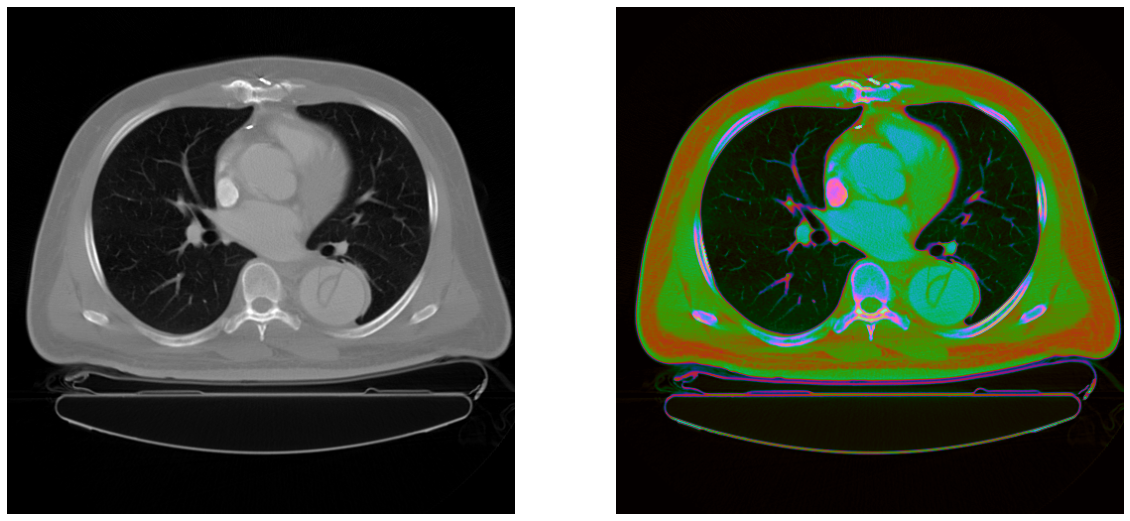

In [ ]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

start_color = 1
rotations = 3
hue = 2
gamma = 1
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    
    
    for i in np.arange(256):
        # YOUR CODE HERE
        gry = i/256
        theta = 2 * np.pi*(start_color/3 + rotations * gry)
        a = (gamma * hue * gry *(1 - gamma*gry)) /2
        lookup_table[i,:] = (gry ** gamma + a * m * np.mat([np.cos(theta), np.sin(theta)]).T).T
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    
    """
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
# printing the jet colormap and how it would look like if printed black and white
show_colormap('jet')

# doing the same for cube helix
show_colormap('cubehelix')


YOUR ANSWER HERE